# Importing Libary and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/pj notebooks/dataset/DataCoSupplyChainDataset.csv", encoding_errors="ignore")
pd.set_option('display.max_columns',None)

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.head(20)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastn,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastn,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,XXXXXXXXX,Kimberly,19488,Flowers,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,19488,1/13/2018 11:03,75935,1360,32.779999,0.10,179250,327.75,0.06,1,327.75,294.980011,18.580000,Oceania,Queensland,CANCELED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,1/13/2018 10:42,75934,1360,39.330002,0.12,179249,327.75,0.

In [ ]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
df['Product Status'].value_counts(ascending = False)

0    180519
Name: Product Status, dtype: int64

**Null data**

Null data was found in three columns, Order Zipcode (86% null values, i.e. a total of 155679 records), Product description (100% null values, i.e. a total of 180519 records) and customer zipcode & customer Last Name (<0.1% is say a total of 3 records and 8 record respectively), together these empty cells correspond to 3.5% of the total dataset

**Categorical variables**

There are 28 variables that have been identified as categorical type, however, some variables were classified as categorical when they are numeric, for example Days for shipping and Order item quantity, this happens because all the values ​​are grouped into 4 discrete values, which which causes confusion on the part of pandas profiling. In order to carry out analysis, these variables must be considered as numerical.

**Numeric variables**

 There are 24 variables that have been identified as numeric type

**Customer Country**

Puerto Rico, an island in the Caribbean Sea, has been a territory of the United States since 1898, after the U.S. defeated Spain in the Spanish-American war. It’s classified as an “unincorporated territory,” meaning the island is controlled by the U.S. government but is separate from the mainland. So the customer country column will be of all United States. There is no use of the customer country column


**Conclusions**

We would not include in the analysis the columns order zipcode (almost empty), product description (totally empty), customer email (constant without information), Customer password (constant without information), customer zipcode column.

Finally, there are some columns that can be ignored when doing the analysis since they do not provide relevant information for the objective of the study, these columns are: Product Image, Customer Fname, Customer Lname, Product Description.

In [ ]:
df.drop(["Customer Email","Customer Password","Product Image","Customer Fname","Customer Lname","Product Description","Order Zipcode","Customer Zipcode","Customer Country","Order City","Customer Street","Order State","Product Status"],axis=1,inplace=True)

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [ ]:
df.rename(columns={"Type":"Type Of Payments"},inplace=True)

### Removing Redundancies

At this point, we can see that even the Order Customer Id and Customer Id are the same. It would make sense to make a function that check for all columns wether the values match to 100% to remove redundancies. Otherwiese one could opt to consult the makers of the dataset for further info

In [ ]:
from itertools import combinations

def check_redundancies(data):

    redundancy_list = []

    for i in list(combinations(data.columns, 2)):

        if all(data[i[0]] == data[i[1]]):
            redundancy_list.append(i)
            print("{} and {} are the same".format(*i))

    return redundancy_list

redundancies = check_redundancies(df)

Benefit per order and Order Profit Per Order are the same
Sales per customer and Order Item Total are the same
Category Id and Product Category Id are the same
Customer Id and Order Customer Id are the same
Order Item Cardprod Id and Product Card Id are the same
Order Item Product Price and Product Price are the same


In [ ]:
df.drop(["Benefit per order","Order Item Total","Category Id","Customer Id","Order Item Cardprod Id","Order Item Product Price"],axis=1,inplace=True)

In [ ]:
# Review columns:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type Of Payments               180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Segment               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Department Id                  180519 non-null  int64  
 11  Department Name                180519 non-null  object 
 12  Latitude                      

In [ ]:
df['Customer State'].value_counts(ascending = False)

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64

In [ ]:
rows_to_delete = df[(df['Customer State'] == '95758') | (df['Customer State'] == '91732')].index

# Drop the identified rows
df = df.drop(rows_to_delete)

In [ ]:
df['Category Name'].value_counts(ascending = False)

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               837
Children's Clothing       651
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      430
Boxing & MMA              423
Books     

In [ ]:
# We will create a function to insert all categories with count < 500 into 'Others'

categories = df['Category Name'].value_counts(ascending = False)
categories_under500 = categories[categories < 500]

In [ ]:
def handle_categories(value):
    if(value in categories_under500):
        return 'Others'
    else:
        return value

df['Category Name'] = df['Category Name'].apply(handle_categories)

In [ ]:
df['Category Name'].value_counts(ascending = False)

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Others                   8636
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               837
Children's Clothing       651
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Name: Category Name, dtype: int64

Format object column of "shipping date (DateOrders)" and "order date (DateOrders)" into datetime

In [ ]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M').dt.strftime('%d/%m/%Y')

In [ ]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M').dt.strftime('%d/%m/%Y')

In [ ]:
df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,314.640015,Advance shipping,0,Others,Caguas,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,20755,31/01/2018,77202,13.110000,0.04,180517,0.29,1,327.75,91.250000,Southeast Asia,COMPLETE,1360,73,Smart watch,327.75,03/02/2018,Standard Class
1,TRANSFER,5,4,311.359985,Late delivery,1,Others,Caguas,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,India,19492,13/01/2018,75939,16.389999,0.05,179254,-0.80,1,327.75,-249.089996,South Asia,PENDING,1360,73,Smart watch,327.75,18/01/2018,Standard Class
2,CASH,4,4,309.720001,Shipping on time,0,Others,San Jose,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,India,19491,13/01/2018,75938,18.030001,0.06,179253,-0.80,1,327.75,-247.779999,South Asia,CLOSED,1360,73,Smart watch,327.75,17/01/2018,Standard Class
3,DEBIT,3,4,304.809998,Advance shipping,0,Others,Los Angeles,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Australia,19490,13/01/2018,75937,22.940001,0.07,179252,0.08,1,327.75,22.860001,Oceania,COMPLETE,1360,73,Smart watch,327.75,16/01/2018,Standard Class
4,PAYMENT,2,4,298.250000,Advance shipping,0,Others,Caguas,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Australia,19489,13/01/2018,75936,29.500000,0.09,179251,0.45,1,327.75,134.210007,Oceania,PENDING_PAYMENT,1360,73,Smart watch,327.75,15/01/2018,Standard Class


In [ ]:
# Order Country

df['Order Country'].value_counts(ascending = False)

Estados Unidos       24840
Francia              13221
Mxico                13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Shara Occidental         2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 164, dtype: int64

In [ ]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japn',
       'Corea del Sur', 'Singapur', 'Turqua', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'Repblica Democrtica del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Pases Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panam',
       'Repblica Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'Mxico', 'Uruguay', 'Argentina', 'Cuba', 'Per',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudn', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'Espaa', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Nger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Banglads', 'Tailandia', 'Irak', 'Arabia Saud',
       'Filipinas', 'Kazajistn', 'Irn', 'Myanmar (Birmania)', 'Uzbekistn',
       'Benn', 'Camern', 'Kenia', 'Togo', 'Ucrania', 'Polonia',
       'Portugal', 'Rumania', 'Trinidad y Tobago', 'Afganistn', 'Pakis

In [ ]:
# As some countries in the list is in Spanaish, for futher use it is translated in English
corrections = {
    'Indonesia': 'Indonesia',
    'India': 'India',
    'Australia': 'Australia',
    'China': 'China',
    'Japn': 'Japan',
    'Corea del Sur': 'South Korea',
    'Singapur': 'Singapore',
    'Turqua': 'Turkey',
    'Butn': 'Bhutan',
    'Estados Unidos': 'United States',
    'Nigeria': 'Nigeria',
    'Repblica Democrtica del Congo': 'Democratic Republic of the Congo',
    'Marruecos': 'Morocco',
    'Alemania': 'Germany',
    'Francia': 'France',
    'Pases Bajos': 'Netherlands',
    'Reino Unido': 'United Kingdom',
    'Guatemala': 'Guatemala',
    'El Salvador': 'El Salvador',
    'Panam': 'Panama',
    'Repblica Dominicana': 'Dominican Republic',
    'Venezuela': 'Venezuela',
    'Colombia': 'Colombia',
    'Honduras': 'Honduras',
    'Brasil': 'Brazil',
    'Mxico': 'Mexico',
    'Argentina': 'Argentina',
    'Cuba': 'Cuba',
    'Per': 'Peru',
    'Nicaragua': 'Nicaragua',
    'Angola': 'Angola',
    'Egipto': 'Egypt',
    'Italia': 'Italy',
    'Espaa': 'Spain',
    'Suecia': 'Sweden',
    'Austria': 'Austria',
    'Canada': 'Canada',
    'Argelia': 'Algeria',
    'Sudfrica': 'South Africa',
    'Tanzania': 'Tanzania',
    'Nueva Zelanda': 'New Zealand',
    'Bangladesh': 'Bangladesh',
    'Tailandia': 'Thailand',
    'Irak': 'Iraq',
    'Arabia Saud': 'Saudi Arabia',
    'Filipinas': 'Philippines',
    'Irn': 'Iran',
    'Myanmar (Birmania)': 'Myanmar',
    'Ucrania': 'Ukraine',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Rumania': 'Romania',
    'Pakistn': 'Pakistan',
    'Vietnam': 'Vietnam',
    'Malasia': 'Malaysia',
    'Rusia': 'Russia',
    'Irlanda': 'Ireland',
    'Noruega': 'Norway',
    'Blgica': 'Belgium',
    'Chile': 'Chile',
    'Suiza': 'Switzerland',
    'Hait': 'Haiti',
    'Tawin':'Taiwan',
     "Sudn": "Sudan",
    "Somalia": "Somalia",
    "Costa de Marfil": "Ivory Coast",
    "Egypt": "Egypt",
    "Italy": "Italy",
    "Spain": "Spain",
    "Sweden": "Sweden",
    "Nger": "Niger",
    "SudAfrica": "South Africa",
    "Mozambique": "Mozambique",
    "Tanzania": "Tanzania",
    "Ruanda": "Rwanda",
    "Israel": "Israel",
    "New Zealand": "New Zealand",
    "Banglads": "Bangladesh",
    "Philippines": "Philippines",
    "Kazajistn": "Kazakhstan",
    "Iran": "Iran",
    "Myanmar": "Myanmar",
    "Uzbekistn": "Uzbekistan",
    "Benn": "Benin",
    "Camern": "Cameroon",
    "Kenia": "Kenya",
    "Togo": "Togo",
    "Ukraine": "Ukraine",
    "Poland": "Poland",
    "Portugal": "Portugal",
    "Romania": "Romania",
    "Trinidad y Tobago": "Trinidad and Tobago",
    "Afganistn": "Afghanistan",
    "Pakistan": "Pakistan",
    "Vietnam": "Vietnam",
    "Malaysia": "Malaysia",
    "Finlandia": "Finland",
    "Russia": "Russia",
    "Ireland": "Ireland",
    "Norway": "Norway",
    "Eslovaquia": "Slovakia",
    "Belgium": "Belgium",
    "Bolivia": "Bolivia",
    "Chile": "Chile",
    "Jamaica": "Jamaica",
    "Yemen": "Yemen",
    "Ghana": "Ghana",
    "Guinea": "Guinea",
    "Etiopa": "Ethiopia",
    "Bulgaria": "Bulgaria",
    "Kirguistn": "Kyrgyzstan",
    "Georgia": "Georgia",
    "Nepal": "Nepal",
    "Emiratos rabes Unidos": "United Arab Emirates",
    "Camboya": "Cambodia",
    "Uganda": "Uganda",
    "Lesoto": "Lesotho",
    "Lituania": "Lithuania",
    "Switzerland": "Switzerland",
    "Hungra": "Hungary",
    "Dinamarca": "Denmark",
    "Haiti": "Haiti",
    "Bielorrusia": "Belarus",
    "Croacia": "Croatia",
    "Laos": "Laos",
    "Barin": "Barbados",
    "Macedonia": "North Macedonia",
    "Repblica Checa": "Czech Republic",
    "Sri Lanka": "Sri Lanka",
    "Zimbabue": "Zimbabwe",
    "Eritrea": "Eritrea",
    "Burkina Faso": "Burkina Faso",
    "Costa Rica": "Costa Rica",
    "Libia": "Libya",
    "Barbados": "Barbados",
    "Tayikistn": "Tajikistan",
    "Siria": "Syria",
    "Guadalupe": "Guadeloupe",
    "Papa Nueva Guinea": "Papua New Guinea",
    "Azerbaiyn": "Azerbaijan",
    "Turkmenistn": "Turkmenistan",
    "Paraguay": "Paraguay",
    "Jordania": "Jordan",
    "Hong Kong": "Hong Kong",
    "Martinica": "Martinique",
    "Moldavia": "Moldova",
    "Qatar": "Qatar",
    "Mali": "Mali",
    "Albania": "Albania",
    "Repblica del Congo": "Republic of the Congo",
    "Bosnia y Herzegovina": "Bosnia and Herzegovina",
    "Omn": "Oman",
    "Tnez": "Tunisia",
    "Sierra Leona": "Sierra Leone",
    "Yibuti": "Djibouti",
    "Burundi": "Burundi",
    "Montenegro": "Montenegro",
    "Gabn": "Gabon",
    "Shara Occidental":"Western Sahara",
    "Butn":"Bhutan",
    "Sudn del Sur":"South Sudan",
    'Luxemburgo':"Luxembourg",
    "Suazilandia":"Eswatini",
    "Guayana Francesa":"French Guiana",
    'Repblica Centroafricana':"Central African Republic",
    "Taiwn":"Taiwan",
    "Lbano":"Lebanon",
    'Eslovenia':"Slovenia",
    'Repblica de Gambia':'The Gambia',
    'Botsuana':"Botswana",
    'Guinea Ecuatorial':'Equatorial Guinea'
}

df['Order Country'] = df['Order Country'].replace(corrections)

In [ ]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japan', 'South Korea',
       'Singapore', 'Turkey', 'Mongolia', 'United States', 'Nigeria',
       'Democratic Republic of the Congo', 'Senegal', 'Morocco',
       'Germany', 'France', 'Netherlands', 'United Kingdom', 'Guatemala',
       'El Salvador', 'Panama', 'Dominican Republic', 'Venezuela',
       'Colombia', 'Honduras', 'Brazil', 'Mexico', 'Uruguay', 'Argentina',
       'Cuba', 'Peru', 'Nicaragua', 'Ecuador', 'Angola', 'Sudan',
       'Somalia', 'Ivory Coast', 'Egypt', 'Italy', 'Spain', 'Sweden',
       'Austria', 'Canada', 'Madagascar', 'Algeria', 'Liberia', 'Zambia',
       'Niger', 'South Africa', 'Mozambique', 'Tanzania', 'Rwanda',
       'Israel', 'New Zealand', 'Bangladesh', 'Thailand', 'Iraq',
       'Saudi Arabia', 'Philippines', 'Kazakhstan', 'Iran', 'Myanmar',
       'Uzbekistan', 'Benin', 'Cameroon', 'Kenya', 'Togo', 'Ukraine',
       'Poland', 'Portugal', 'Romania', 'Trinidad and Tobago',
       'Afghanistan', 'Pak

In [ ]:
# Sales

df['Sales'] = df['Sales'].round(2)

In [ ]:
# Product Name

df['Product Name'].sample(10)

35239               Nike Men's Free 5.0+ Running Shoe
96733                Perfect Fitness Perfect Rip Deck
138194      Field & Stream Sportsman 16 Gun Fire Safe
87135                O'Brien Men's Neoprene Life Vest
168242    Under Armour Hustle Storm Medium Duffle Bag
117755              Under Armour Women's Ignite Slide
36957                              Adult dog supplies
19309                Perfect Fitness Perfect Rip Deck
63166               Nike Men's Free 5.0+ Running Shoe
88497                                  Summer dresses
Name: Product Name, dtype: object

In [ ]:
df['Product Name'].value_counts(ascending = False)

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: Product Name, Length: 118, dtype: int64

In [ ]:
# We will group all product names < 1500 as 'Others'

products = df['Product Name'].value_counts(ascending = False)
products_under1500 = products[products < 1500]

def handle_products(value):
    if(value in products_under1500):
        return 'Others'
    else:
        return value

df['Product Name'] = df['Product Name'].apply(handle_products)

In [ ]:
df['Product Name'].value_counts(ascending = False)

Perfect Fitness Perfect Rip Deck                 24515
Others                                           24082
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Name: Product Name, dtype: int64

In [ ]:
# Order Region

df['Order Region'].value_counts(ascending = False)

Central America    28341
Western Europe     27108
South America      14935
Oceania            10148
Northern Europe     9791
Southeast Asia      9538
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

In [ ]:
# Group multiple regions of North America into North America
# For object data, we will use 'index.isin()'

order_regions = df['Order Region'].value_counts(ascending = False)
n_america = ['West of USA ', 'US Center ', 'South of  USA ', 'East of USA', 'Canada', 'Caribbean']
n_america_regions = order_regions[order_regions.index.isin(n_america)]

def handle_region(value):
    if(value in n_america_regions):
        return 'North America'
    else:
        return value

df['Order Region'] = df['Order Region'].apply(handle_region)

In [ ]:
df['Order Region'].value_counts()

North America      34117
Central America    28341
Western Europe     27108
South America      14935
Oceania            10148
Northern Europe     9791
Southeast Asia      9538
Southern Europe     9431
South Asia          7731
Eastern Asia        7280
West Asia           6009
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Central Asia         553
Name: Order Region, dtype: int64

In [ ]:
df['Customer State'].value_counts(ascending = False)

PR    69373
CA    29223
NY    11327
TX     9103
IL     7631
FL     5456
OH     4095
PA     3824
MI     3804
NJ     3191
AZ     3026
GA     2503
MD     2415
NC     1992
CO     1914
VA     1849
OR     1668
MA     1607
TN     1582
NV     1440
MO     1354
HI     1248
CT     1094
UT      968
NM      949
LA      948
WA      920
WI      850
MN      672
SC      665
IN      581
DC      579
KY      487
KS      458
DE      269
RI      243
WV      241
OK      232
ND      215
ID      167
AR      164
MT       87
IA       67
AL       35
Name: Customer State, dtype: int64

In [ ]:
# Dictionary mapping abbreviations to state names
state_mapping = {
    'PR': 'Puerto Rico',
    'CA': 'California',
    'NY': 'New York',
    'TX': 'Texas',
    'IL': 'Illinois',
    'FL': 'Florida',
    'OH': 'Ohio',
    'PA': 'Pennsylvania',
    'MI': 'Michigan',
    'NJ': 'New Jersey',
    'AZ': 'Arizona',
    'GA': 'Georgia',
    'MD': 'Maryland',
    'NC': 'North Carolina',
    'CO': 'Colorado',
    'VA': 'Virginia',
    'OR': 'Oregon',
    'MA': 'Massachusetts',
    'TN': 'Tennessee',
    'NV': 'Nevada',
    'MO': 'Missouri',
    'HI': 'Hawaii',
    'CT': 'Connecticut',
    'UT': 'Utah',
    'NM': 'New Mexico',
    'LA': 'Louisiana',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'MN': 'Minnesota',
    'SC': 'South Carolina',
    'IN': 'Indiana',
    'DC': 'District of Columbia',
    'KY': 'Kentucky',
    'KS': 'Kansas',
    'DE': 'Delaware',
    'RI': 'Rhode Island',
    'WV': 'West Virginia',
    'OK': 'Oklahoma',
    'ND': 'North Dakota',
    'ID': 'Idaho',
    'AR': 'Arkansas',
    'MT': 'Montana',
    'IA': 'Iowa',
    'AL': 'Alabama'
}

# Replace abbreviations with state names
df['Customer State'] = df['Customer State'].replace(state_mapping)


In [ ]:
df['Customer State'].value_counts(ascending = False)

Puerto Rico             69373
California              29223
New York                11327
Texas                    9103
Illinois                 7631
Florida                  5456
Ohio                     4095
Pennsylvania             3824
Michigan                 3804
New Jersey               3191
Arizona                  3026
Georgia                  2503
Maryland                 2415
North Carolina           1992
Colorado                 1914
Virginia                 1849
Oregon                   1668
Massachusetts            1607
Tennessee                1582
Nevada                   1440
Missouri                 1354
Hawaii                   1248
Connecticut              1094
Utah                      968
New Mexico                949
Louisiana                 948
Washington                920
Wisconsin                 850
Minnesota                 672
South Carolina            665
Indiana                   581
District of Columbia      579
Kentucky                  487
Kansas    

In [ ]:
df.head(30)

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,314.640015,Advance shipping,0,Others,Caguas,Consumer,Puerto Rico,2,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,20755,31/01/2018,77202,13.110000,0.04,180517,0.29,1,327.75,91.250000,Southeast Asia,COMPLETE,1360,73,Others,327.75,03/02/2018,Standard Class
1,TRANSFER,5,4,311.359985,Late delivery,1,Others,Caguas,Consumer,Puerto Rico,2,Fitness,18.279451,-66.037064,Pacific Asia,India,19492,13/01/2018,75939,16.389999,0.05,179254,-0.80,1,327.75,-249.089996,South Asia,PENDING,1360,73,Others,327.75,18/01/2018,Standard Class
2,CASH,4,4,309.720001,Shipping on time,0,Others,San Jose,Consumer,California,2,Fitness,37.292233,-121.881279,Pacific Asia,India,19491,13/01/2018,75938,18.030001,0.06,179253,-0.80,1,327.75,-247.779999,South Asia,CLOSED,1360,73,Others,327.75,17/01/2018,Standard Class
3,DEBIT,3,4,304.809998,Advance shipping,0,Others,Los Angeles,Home Office,California,2,Fitness,34.125946,-118.291016,Pacific Asia,Australia,19490,13/01/2018,75937,22.940001,0.07,179252,0.08,1,327.75,22.860001,Oceania,COMPLETE,1360,73,Others,327.75,16/01/2018,Standard Class
4,PAYMENT,2,4,298.250000,Advance shipping,0,Others,Caguas,Corporate,Puerto Rico,2,Fitness,18.253769,-66.037048,Pacific Asia,Australia,19489,13/01/2018,75936,29.500000,0.09,179251,0.45,1,327.75,134.210007,Oceania,PENDING_PAYMENT,1360,73,Others,327.75,15/01/2018,Standard Class
5,TRANSFER,6,4,294.980011,Shipping canceled,0,Others,Tonawanda,Consumer,New York,2,Fitness,43.013969,-78.879066,Pacific Asia,Australia,19488,13/01/2018,75935,32.779999,0.10,179250,0.06,1,327.75,18.580000,Oceania,CANCELED,1360,73,Others,327.75,19/01/2018,Standard Class
6,DEBIT,2,1,288.420013,Late delivery,1,Others,Caguas,Home Office,Puerto Rico,2,Fitness,18.242538,-66.037056,Pacific Asia,China,19487,13/01/2018,75934,39.330002,0.12,179249,0.33,1,327.75,95.180000,Eastern Asia,COMPLETE,1360,73,Others,327.75,15/01/2018,First Class
7,TRANSFER,2,1,285.140015,Late delivery,1,Others,Miami,Corporate,Florida,2,Fitness,25.928869,-80.162872,Pacific Asia,China,19486,13/01/2018,75933,42.610001,0.13,179248,0.24,1,327.75,68.430000,Eastern Asia,PROCESSING,1360,73,Others,327.75,15/01/2018,First Class
8,CASH,3,2,278.589996,Late delivery,1,Others,Caguas,Corporate,Puerto Rico,2,Fitness,18.233223,-66.037056,Pacific Asia,China,19485,13/01/2018,75932,49.160000,0.15,179247,0.48,1,327.75,133.720001,Eastern Asia,CLOSED,1360,73,Others,327.75,16/01/2018,Second Class
9,CASH,2,1,275.309998,Late delivery,1,Others,San Ramon,Corporate,California,2,Fitness,37.773991,-121.966629,Pacific Asia,China,19484,13/01/2018,75931,52.439999,0.16,179246,0.48,1,327.75,132.149994,Eastern Asia,CLOSED,1360,73,Others,327.75,15/01/2018,First Class


In [ ]:
df['Delivery Status'].value_counts(ascending = False)

Late delivery        98976
Advance shipping     41592
Shipping on time     32194
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [ ]:
df.to_csv("/content/drive/MyDrive/pj notebooks/dataset/Processed_DataCoSupplyChainDataset.csv",index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180516 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type Of Payments               180516 non-null  object 
 1   Days for shipping (real)       180516 non-null  int64  
 2   Days for shipment (scheduled)  180516 non-null  int64  
 3   Sales per customer             180516 non-null  float64
 4   Delivery Status                180516 non-null  object 
 5   Late_delivery_risk             180516 non-null  int64  
 6   Category Name                  180516 non-null  object 
 7   Customer City                  180516 non-null  object 
 8   Customer Segment               180516 non-null  object 
 9   Customer State                 180516 non-null  object 
 10  Department Id                  180516 non-null  int64  
 11  Department Name                180516 non-null  object 
 12  Latitude                      

# Correlation Matrix

To find important parameters, data correlation is performed.

<ipython-input-641-f6095461709a>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

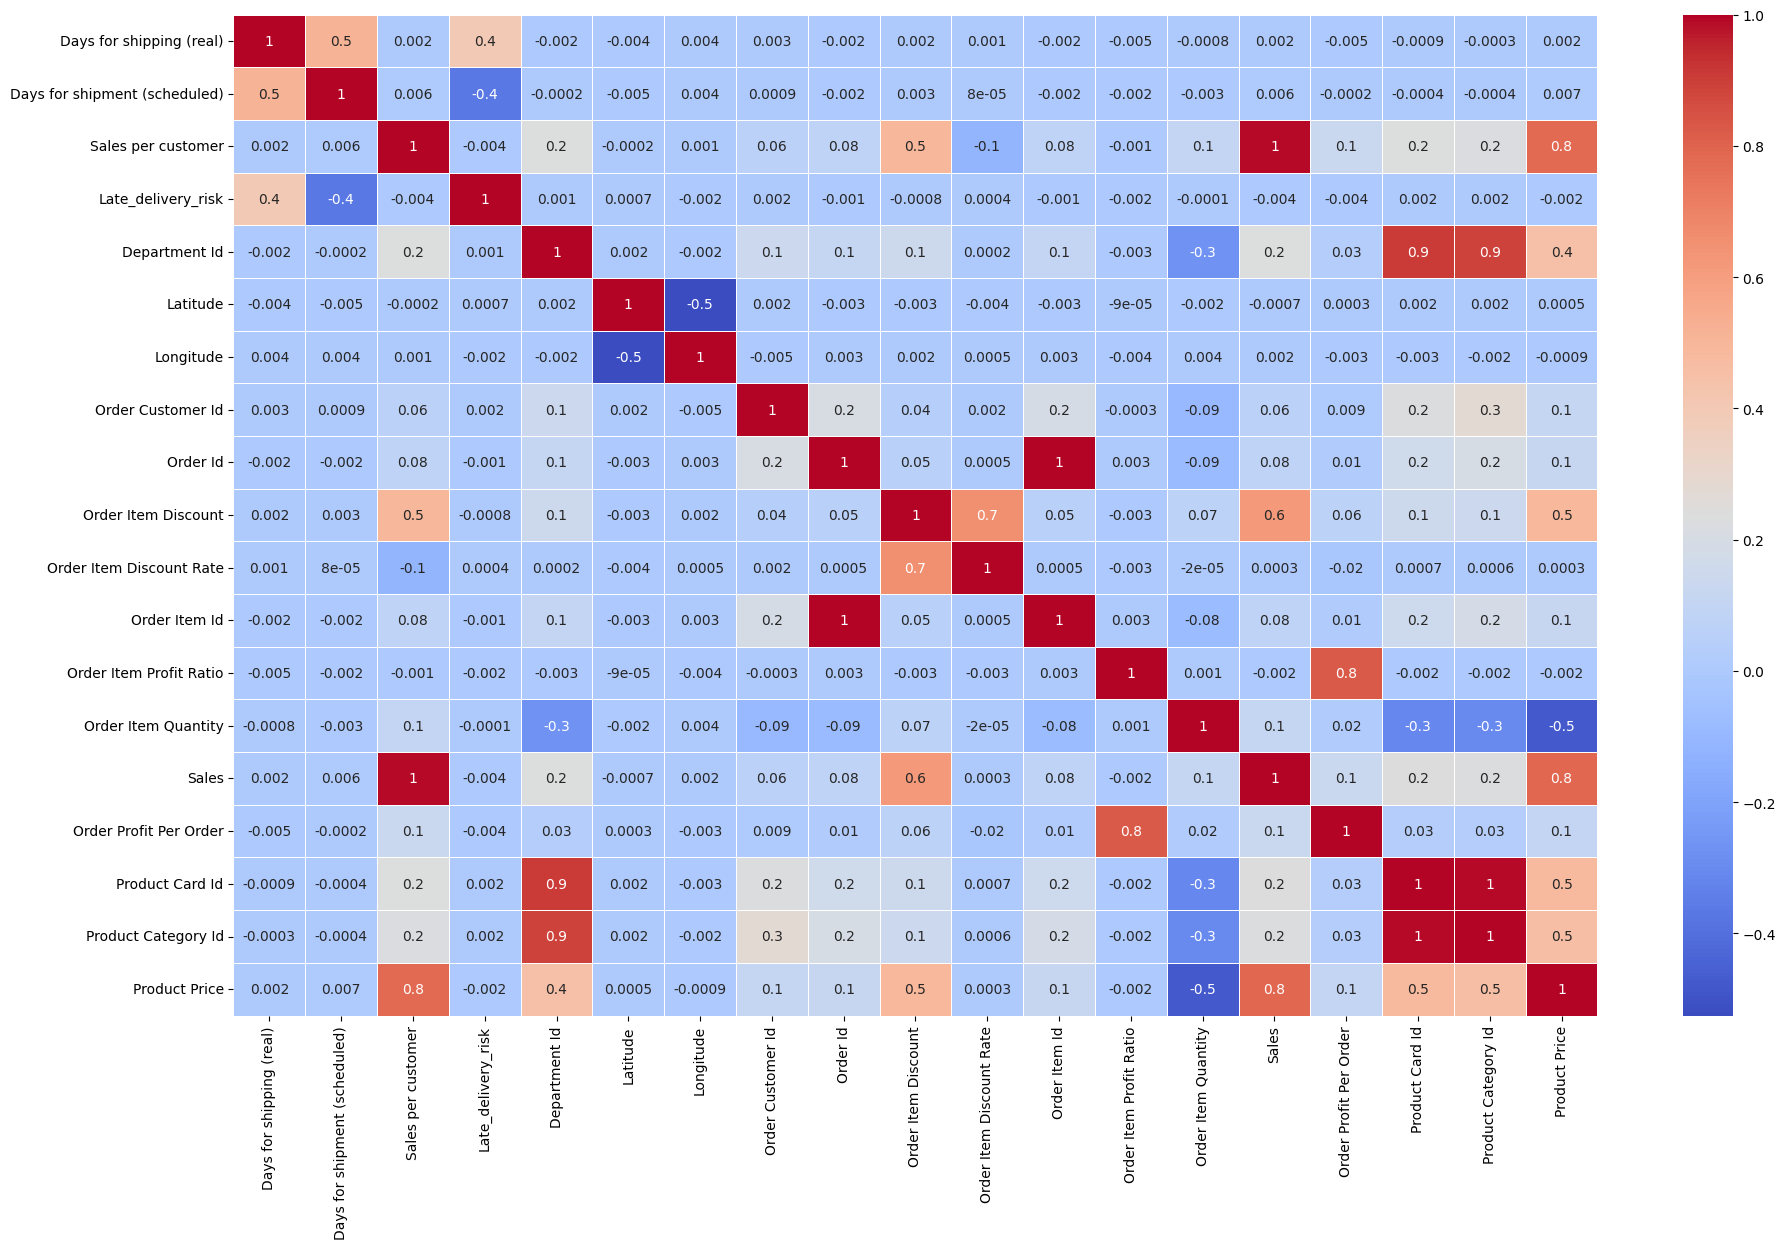

In [ ]:
fig, ax = plt.subplots(figsize=(22,13))         # figsize
# Here, the plt.subplots() function is used to create a figure and a set of subplots.
# The fig, ax are the variables that will hold the figure and axes objects, respectively.
# The figsize parameter sets the width and height of the figure in inches.
# In this case, the figure size is set to 22 inches in width and 13 inches in height.

sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix
#This line generates the heatmap using the sns.heatmap() function.

# df.corr(): This part of the code calculates the correlation matrix of the DataFrame df. The corr() function computes the pairwise correlation of columns in the DataFrame.
# annot=True: This parameter specifies that the correlation values should be annotated on the heatmap cells.
# linewidths=.5: This parameter sets the width of the lines that separate the cells of the heatmap.
# fmt='.1g': This parameter controls the formatting of the annotation values. In this case, it's set to display the values with one decimal place in general format.
# cmap='coolwarm': This parameter sets the color map for the heatmap.
# 'coolwarm' is a diverging color map that ranges from cool colors (e.g., blue) to warm colors (e.g., red) to represent positive and negative correlations.

The value of the correlation coefficient can take any values from -1 to 1.

- If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases.

- If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.

- If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.

We can observe that product price price has high correlation with Sales,Order Item Total.

# **Hypothesis Testing**

In [ ]:
ht_df = df.copy()

In [ ]:
from scipy import stats # for hypothesis testing

## Hypothesis 1: Impact of delivery time on order profitability

### Null hypothesis: There is no significant difference in order profitability between orders with shorter actual delivery time and those with longer delivery time.
### Alternative hypothesis: Orders with a shorter actual delivery time are more profitable than those with a longer delivery time.

In [ ]:
# calculating the delivery time difference
ht_df["Delivery_Time_Difference"] = ht_df["Days for shipping (real)"] - ht_df["Days for shipment (scheduled)"]

# split the data into two groups based on the delivery time difference
short_delivery = ht_df[ht_df["Delivery_Time_Difference"] < 0]
long_delivery = ht_df[ht_df["Delivery_Time_Difference"] >= 0]

# Conducting a two-sample t-test to compare the mean order profit per order between the two groups
t_stat, p_value = stats.ttest_ind(short_delivery["Order Profit Per Order"], long_delivery["Order Profit Per Order"], equal_var=False)

alpha = 0.05

print("Hypothesis 1: Impact of delivery time on order profitability")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 1: Impact of delivery time on order profitability
t-statistic: 1.1405142299533106
p-value: 0.25407583425621577
Fail to reject the null hypothesis


## Hypothesis 2: Relationship between sales per customer and delivery status


### Null hypothesis: There is no significant difference in sales per customer between orders delivered on time and those that are not.
### Alternative hypothesis: Customers who receive their orders on time have higher sales per customer than those who do not.


In [ ]:
# create two groups based on the delivery status
on_time1 = ht_df[ht_df["Delivery Status"] == "Shipping on time"]
on_time2 = ht_df[ht_df["Delivery Status"] == "Advance shipping"]
on_time=pd.concat([on_time1, on_time2], axis=0)
not_on_time = ht_df[ht_df["Delivery Status"] == "Late delivery"]

# Conducting a two-sample t-test to compare the mean sales per customer between the two groups
t_stat, p_value = stats.ttest_ind(on_time["Sales per customer"], not_on_time["Sales per customer"], equal_var=False)

print("Hypothesis 2: Relationship between sales per customer and delivery status")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 2: Relationship between sales per customer and delivery status
t-statistic: 1.8831012266781173
p-value: 0.05968849992613582
Fail to reject the null hypothesis


##### Based on the output, the t-statistic is 1.88 and the p-value is 0.0598, which is higher than the significance level of 0.05.
##### Therefore, we fail to reject the null hypothesis that there is no significant difference in sales per customer between orders delivered on time and those that are not.
##### This means that there is insufficient evidence to conclude that customers who receive their orders on time have higher sales per customer than those who do not. However, since the p-value is relatively close to the significance level, further investigation may be warranted to determine if there is a potential relationship between delivery status and sales per customer.

## Hypothesis 3: Impact of late delivery risk on order profit


### Null hypothesis: There is no significant difference in order profitability between orders with high and low late delivery risk.
### Alternative hypothesis: Orders with a higher late delivery risk are less profitable than those with a lower late delivery risk.


In [ ]:
# create two groups based on the late delivery risk
high_risk = ht_df[ht_df["Late_delivery_risk"] == 1]
low_risk = ht_df[ht_df["Late_delivery_risk"] == 0]

# Conducting a two-sample t-test to compare the mean order profit per order between the two groups
t_stat, p_value = stats.ttest_ind(high_risk["Order Profit Per Order"], low_risk["Order Profit Per Order"], equal_var=False)

print("Hypothesis 3: Impact of late delivery risk on order profit")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Hypothesis 3: Impact of late delivery risk on order profit
t-statistic: -1.5871340032452448
p-value: 0.11248410145210566
Fail to reject the null hypothesis


##### Based on the given output, the calculated t-statistic is -1.59 and the p-value is 0.11. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in order profitability between orders with high and low late delivery risk.

## Hypothesis 4: Relationship between product price and sales:

### Null Hypothesis (H0): There is no significant relationship between product price and sales.
### Alternative Hypothesis (H1): There is a significant relationship between product price and sales.

In [ ]:
# Filter the relevant columns
df1 = ht_df[['Product Price', 'Sales']]

# Calculate the correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(df1['Product Price'], df1['Sales'])

alpha = 0.05

print("Hypothesis: Relationship between product price and sales")
print("Correlation coefficient:", corr_coef)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis: Relationship between product price and sales
Correlation coefficient: 0.7899460191767189
p-value: 0.0
Reject the null hypothesis


#####  The p-value of 0.0 indicates that there is a very low probability of observing such a strong correlation by chance, which leads to the rejection of the null hypothesis. Therefore, we can conclude that there is a significant relationship between product price and sales.

## Hypothesis 5: Impact of shipping mode on order profitability

#### Null hypothesis: There is no significant difference in order profitability between different shipping modes.
#### Alternative hypothesis: Certain shipping modes are more profitable than others.

In [ ]:
# Filter relevant columns for analysis
df_delivery = ht_df[['Shipping Mode', 'Order Profit Per Order']]

#Group the data by shipping mode
shipping_groups = df_delivery.groupby('Shipping Mode')

#Conducting a one-way ANOVA test to compare the mean order profit per order between the shipping mode groups
f_stat, p_value = stats.f_oneway(*[group['Order Profit Per Order'] for name, group in shipping_groups])

alpha = 0.05

print("Hypothesis 5: Impact of shipping mode on order profitability")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 5: Impact of shipping mode on order profitability
F-statistic: 1.9760400987761573
p-value: 0.11516423806216304
Fail to reject the null hypothesis


##### Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in order profitability between different shipping modes.

## Hypothesis 6: Relationship between product category and order profitability

### Null hypothesis: There is no significant difference in order profitability between different product categories.
### Alternative hypothesis: Certain product categories are more profitable than others.

In [ ]:
#Filter the relevant columns
df2 = ht_df[['Product Category Id', 'Order Profit Per Order']]

#Group the data by product category
product_groups = df2.groupby("Product Category Id")

#Conducting a one-way ANOVA test to compare the mean order profit per order between the product groups
f_stat, p_value = stats.f_oneway(*[group['Order Profit Per Order'] for name, group in product_groups])

alpha = 0.05

print("Hypothesis 6: Relationship between product category and order profitability")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 6: Relationship between product category and order profitability
F-statistic: 50.74877365263413
p-value: 0.0
Reject the null hypothesis


##### Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in order profitability between different product categories. The alternative hypothesis that certain product categories are more profitable than others is supported by the data.

The output shows that the calculated t-statistic is 1.14 and the corresponding p-value is 0.25.

Since the p-value is higher than the significance level of 0.05, we cannot reject the null hypothesis. This means that there is no significant difference in order profitability between orders with shorter actual delivery time and those with longer delivery time.

Therefore, based on the test results, we cannot say that delivery time has a significant impact on order profitability.

# Customer Segmentation

Understanding customer needs and targeting specific clusters of customers based on their need is one way for a supply chain company to increase number of customers and also to gain more profits.Since,purchase history of customers is already avaialble in the dataset, it can use RFM analysis for customer segmention. Even though there are so many different methods for customer segmentation,RFM analysis is being used because it utilizes numerical values to show Customer recency,frequency and monetary values and also the output results are easy to interpret.

In [ ]:
data=df
# Sales per customer and Order Item Total are the same
# Calculating total price for which each order
data['TotalPrice'] = data['Order Item Quantity'] * data['Sales per customer']# Multiplying item price * Order quantity

In [ ]:
data['order date (DateOrders)'].max() # Calculating when the last order come to check recency

'31/12/2017'

The last order in the dataset was made on 2017-10-1. So the present time is set slightly above than the last order time for more accuracy of recency value.

In [ ]:
#Present date was set to next day of the last order. i.e,2018-02-01
import datetime as dt
from datetime import datetime
present = dt.datetime(2017,10,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

<ipython-input-652-652a8be39f49>:5: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
# Grouping all values into new data frame named customer segmentation
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value',
                         'Order Id': 'F_Value',
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,993,1,2362.250061
2,14,10,2842.700073
3,107,18,6143.760057
4,258,14,4370.629991
5,335,7,2993.790032


R_Value(Recency) indicates how much time elapsed since a customer last order.

F_Value(Frequency) indicates how many times a customer ordered.

M_Value(Monetary value) tells us how much a customer has spent purchasing items.

In [ ]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict()

The total data is divided into 4 quantiles. The R_Value should be low because it indicates recent customer activity and F_value, M_Value should be high since they indicate frequency and total value of purchase. Function is defined to indicate quantiles as numerical values.

In [ ]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]:
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]:
        return 2
    else:
        return 1

In [ ]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,993,1,2362.250061,4,4,3
2,14,10,2842.700073,2,2,2
3,107,18,6143.760057,3,1,1
4,258,14,4370.629991,4,2,2
5,335,7,2993.790032,4,3,2


The individual scores of R,F,M are known.A column for combined RFM score is created.

In [ ]:
#Adding R,F,M Scores to one new column
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,993,1,2362.250061,4,4,3,443
2,14,10,2842.700073,2,2,2,222
3,107,18,6143.760057,3,1,1,311
4,258,14,4370.629991,4,2,2,422
5,335,7,2993.790032,4,3,2,432


How many different customer segments are there in total can be found using .unique() and len method.

In [ ]:
count=Customer_seg['RFM_Score'].unique()
print(count)# Printing all Unique values
len(count)# Total count

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '433' '221' '231' '232' '423' '233' '312' '333' '323' '223' '111' '321'
 '132' '412' '332' '122' '112' '133' '121' '444' '344' '123' '243' '244'
 '343' '334' '431' '234' '143' '144']


42

It can be seen that there are 33 different customer segments. To make it easier for segmentation individual R,F,M scores are added together

In [ ]:
# Calculate RFM_Score
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10,  3, 12])

There are 9 values in total for customer segmentation.Appropriate names were assigned for each value seperately.

In [ ]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions'
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers'
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5

        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
Customer_seg.head()


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,993,1,2362.250061,4,4,3,443,11,Champions
2,14,10,2842.700073,2,2,2,222,6,Cant lose them
3,107,18,6143.760057,3,1,1,311,5,At Risk
4,258,14,4370.629991,4,2,2,422,8,Promising
5,335,7,2993.790032,4,3,2,432,9,Recent Customers


How many customers are present in each segment?

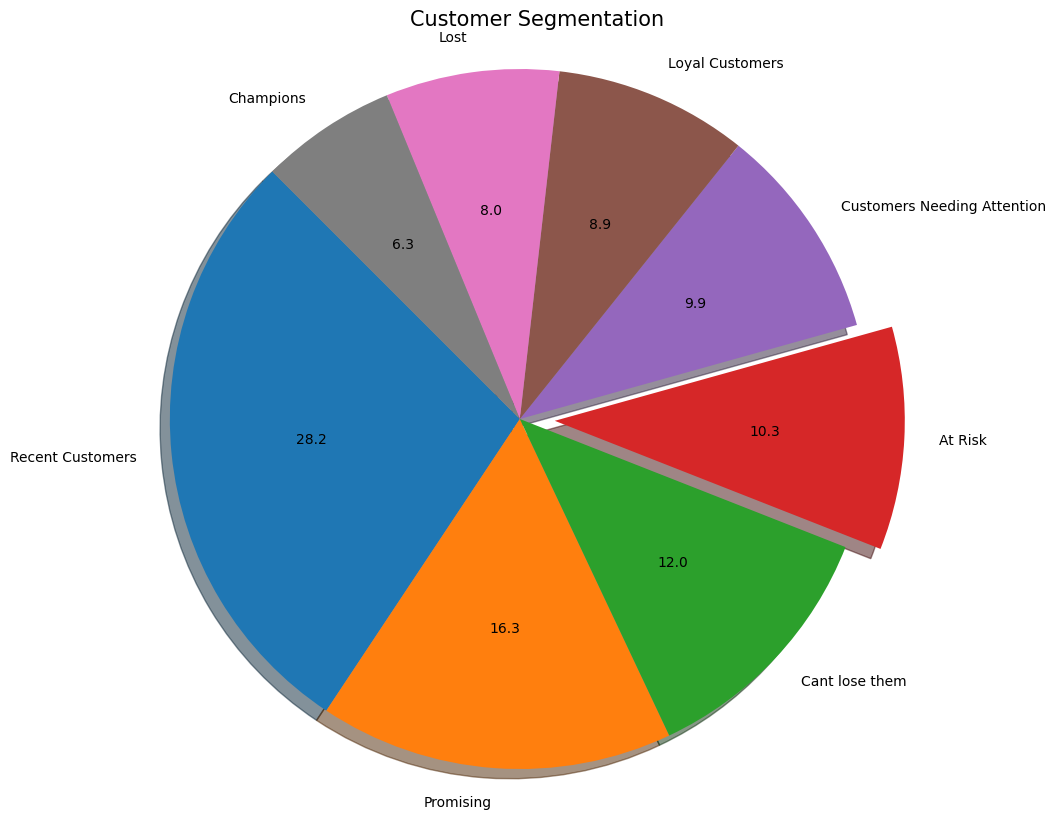

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal')
plt.show()

Since total customers are divided into 9 segments it can be seen that, 11.4% customers are at risk of losing them as customers and 11% customers needs attention else even they will be lost eventually.It can be seen that 4.4% of customers are already lost.

## Our Top 10 Churned best customers who has not purchased anything in a while

In [ ]:
churned=Customer_seg[(Customer_seg['RFM_Score']=='411')].sort_values('M_Value', ascending=False).head(10)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
4181,347,29,17333.960094,4,1,1,411,6,Cant lose them
4781,380,31,17048.380088,4,1,1,411,6,Cant lose them
9271,222,35,17044.910217,4,1,1,411,6,Cant lose them
4659,354,27,16973.060024,4,1,1,411,6,Cant lose them
1937,290,29,16363.320034,4,1,1,411,6,Cant lose them
11430,242,26,15727.260109,4,1,1,411,6,Cant lose them
1222,397,26,15603.139852,4,1,1,411,6,Cant lose them
12180,405,28,15545.510086,4,1,1,411,6,Cant lose them
6948,500,25,15306.230225,4,1,1,411,6,Cant lose them


These customers used to place orders with huge amounts very frequently but they did not place orders from almost a year which means they are purchasing from other companies. These groups of people should be targeted with offers to gain them back.

## Top 10 new best customers who place costly orders often.

In [ ]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
Customer_seg[(Customer_seg['RFM_Score']=='144')|(Customer_seg['RFM_Score']=='143')].sort_values('M_Value', ascending=False).head(10)


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
18047,-83,1,1500.0,1,4,3,143,8,Promising
18065,-83,1,1500.0,1,4,3,143,8,Promising
18101,-84,1,1500.0,1,4,3,143,8,Promising
18083,-83,1,1500.0,1,4,3,143,8,Promising
18119,-84,1,1500.0,1,4,3,143,8,Promising
18100,-84,1,1485.0,1,4,3,143,8,Promising
18118,-84,1,1485.0,1,4,3,143,8,Promising
18082,-83,1,1485.0,1,4,3,143,8,Promising
18064,-83,1,1485.0,1,4,3,143,8,Promising


The above customers has the potential to become best customers this people should be targeted to convert them into loyal customers.All these different segment of customers should be targeted with different tailored advertisments and rewards for increased profits and more responsiveness from customers.

# ABC Analysis

ABC analysis is used for product segmentations. It is a type of supply side segmentation.

ABC analysis has its basis in the pareto rule which states that 80% of outcome comes from 20% of causes.

Similarly here, 80% of the revenue is generated by 20% of all products. High care should be taken that these 20% of the products are always instock.

Here's how we segment product based on their revenue generating capacity.
- We find percentage of total revenue generated by each product.
- Then we arrange them in decreasing order of percentage and we find cumulative percentage of revenue for each of the products.
    - Products generating 75% of revenue would be Class A products
    - Procucts generating next 20% of revenue would be class B products. Products having their cumulative percentage between 75%-95%.
    - Products generating remaining 5% of revenue would be class C products. Long list of products each contribuling very less to total revenue. Also called as long tail. They have their cumulative percentage between 95%-100%


In [ ]:
Total_Products=df["Product Name"].nunique()
print("Total Number of products: "+f"{Total_Products}")

Total Number of products: 10


In [ ]:
from plotly import graph_objects as go
import plotly.express as px
Revenue_ABC=df.groupby(["Department Name","Product Name"]).agg(Total_Revenue=("Sales per customer","sum")).sort_values(by="Total_Revenue",ascending=False).reset_index()
Revenue_ABC["cum_sum"]=Revenue_ABC["Total_Revenue"].cumsum()
Revenue_ABC["cum_per"]=Revenue_ABC["cum_sum"]/Revenue_ABC["Total_Revenue"].sum()*100
Revenue_ABC["per"]=Revenue_ABC["cum_per"]-Revenue_ABC["cum_per"].shift(1)
Revenue_ABC.loc[0,"per"]=Revenue_ABC["cum_per"][0]

In [ ]:
def ABC(data):
    if data["cum_per"]<=75:
        return "A"
    elif data["cum_per"]>75 and data["cum_per"]<=95:
        return "B"
    elif data["cum_per"]>95:
        return "C"

Revenue_ABC["ABC_Revenue"]=Revenue_ABC.apply(ABC,axis=1)

In [ ]:
Bar_graph_Abc=Revenue_ABC[["ABC_Revenue","Product Name","Total_Revenue"]].groupby("ABC_Revenue").agg(Revenue=("Total_Revenue","sum"),count=("Product Name","count"))

In [ ]:
Bar_graph_Abc
fig2=go.Figure(go.Bar(x=Bar_graph_Abc.index,
                      y=Bar_graph_Abc["Revenue"],
                     hovertemplate ="%{label}<br>Revenue:%{value}",
                     texttemplate = "Revenue<br>%{value}",
                     marker_color=["green","yellow","red"],
                     showlegend=False))
fig2.add_trace(
    go.Scatter(
    x=Bar_graph_Abc.index,
    y=Bar_graph_Abc["count"],
    name="Number Of Products",
    mode='lines',
    line = dict(color='blue', width=3),
    yaxis="y2",
    marker_line_width = 0
    ))

fig2.update_layout(
                   title="Revenue Generated By Products in Different ABC Segments",
                   xaxis=dict(title="Segment" ),
                   yaxis=dict(showgrid=False),
                   yaxis2=dict(title="Number Of Products", anchor="x", overlaying="y",side="right",dtick=10),
                   legend = dict(x = 1.05, y = 1))
fig2.show()

In [ ]:
df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,TotalPrice
0,DEBIT,3,4,314.640015,Advance shipping,0,Others,Caguas,Consumer,Puerto Rico,2,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,20755,2018-01-31,77202,13.110000,0.04,180517,0.29,1,327.75,91.250000,Southeast Asia,COMPLETE,1360,73,Others,327.75,03/02/2018,Standard Class,314.640015
1,TRANSFER,5,4,311.359985,Late delivery,1,Others,Caguas,Consumer,Puerto Rico,2,Fitness,18.279451,-66.037064,Pacific Asia,India,19492,2018-01-13,75939,16.389999,0.05,179254,-0.80,1,327.75,-249.089996,South Asia,PENDING,1360,73,Others,327.75,18/01/2018,Standard Class,311.359985
2,CASH,4,4,309.720001,Shipping on time,0,Others,San Jose,Consumer,California,2,Fitness,37.292233,-121.881279,Pacific Asia,India,19491,2018-01-13,75938,18.030001,0.06,179253,-0.80,1,327.75,-247.779999,South Asia,CLOSED,1360,73,Others,327.75,17/01/2018,Standard Class,309.720001
3,DEBIT,3,4,304.809998,Advance shipping,0,Others,Los Angeles,Home Office,California,2,Fitness,34.125946,-118.291016,Pacific Asia,Australia,19490,2018-01-13,75937,22.940001,0.07,179252,0.08,1,327.75,22.860001,Oceania,COMPLETE,1360,73,Others,327.75,16/01/2018,Standard Class,304.809998
4,PAYMENT,2,4,298.250000,Advance shipping,0,Others,Caguas,Corporate,Puerto Rico,2,Fitness,18.253769,-66.037048,Pacific Asia,Australia,19489,2018-01-13,75936,29.500000,0.09,179251,0.45,1,327.75,134.210007,Oceania,PENDING_PAYMENT,1360,73,Others,327.75,15/01/2018,Standard Class,298.250000


# **Feature Selection**

In [ ]:
fs_df=df.copy()

In [ ]:
fs_df=fs_df.drop(['Latitude','Longitude','Order Profit Per Order','Order Item Profit Ratio'],axis=1)

In [ ]:
fs_df.head()

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Segment,Customer State,Department Id,Department Name,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,TotalPrice
0,DEBIT,3,4,314.640015,Advance shipping,0,Others,Caguas,Consumer,Puerto Rico,2,Fitness,Pacific Asia,Indonesia,20755,2018-01-31,77202,13.110000,0.04,180517,1,327.75,Southeast Asia,COMPLETE,1360,73,Others,327.75,03/02/2018,Standard Class,314.640015
1,TRANSFER,5,4,311.359985,Late delivery,1,Others,Caguas,Consumer,Puerto Rico,2,Fitness,Pacific Asia,India,19492,2018-01-13,75939,16.389999,0.05,179254,1,327.75,South Asia,PENDING,1360,73,Others,327.75,18/01/2018,Standard Class,311.359985
2,CASH,4,4,309.720001,Shipping on time,0,Others,San Jose,Consumer,California,2,Fitness,Pacific Asia,India,19491,2018-01-13,75938,18.030001,0.06,179253,1,327.75,South Asia,CLOSED,1360,73,Others,327.75,17/01/2018,Standard Class,309.720001
3,DEBIT,3,4,304.809998,Advance shipping,0,Others,Los Angeles,Home Office,California,2,Fitness,Pacific Asia,Australia,19490,2018-01-13,75937,22.940001,0.07,179252,1,327.75,Oceania,COMPLETE,1360,73,Others,327.75,16/01/2018,Standard Class,304.809998
4,PAYMENT,2,4,298.250000,Advance shipping,0,Others,Caguas,Corporate,Puerto Rico,2,Fitness,Pacific Asia,Australia,19489,2018-01-13,75936,29.500000,0.09,179251,1,327.75,Oceania,PENDING_PAYMENT,1360,73,Others,327.75,15/01/2018,Standard Class,298.250000


In [ ]:
fs_df['Type Of Payments'].value_counts(ascending = False)

DEBIT       69293
TRANSFER    49883
PAYMENT     41724
CASH        19616
Name: Type Of Payments, dtype: int64

In [ ]:
fs_df['Type Of Payments'] = fs_df['Type Of Payments'].replace('PAYMENT', 'CREDIT')

In [ ]:
fs_df['Type Of Payments'] = fs_df['Type Of Payments'].replace('TRANSFER', 'INTERNET BANKING')

In [ ]:
fs_df['Type Of Payments'] = fs_df['Type Of Payments'].replace('CASH', 'COD')

In [ ]:
fs_df['Type Of Payments'].value_counts(ascending = False)

DEBIT               69293
INTERNET BANKING    49883
CREDIT              41724
COD                 19616
Name: Type Of Payments, dtype: int64

In [ ]:
fs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180516 entries, 0 to 180518
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type Of Payments               180516 non-null  object        
 1   Days for shipping (real)       180516 non-null  int64         
 2   Days for shipment (scheduled)  180516 non-null  int64         
 3   Sales per customer             180516 non-null  float64       
 4   Delivery Status                180516 non-null  object        
 5   Late_delivery_risk             180516 non-null  int64         
 6   Category Name                  180516 non-null  object        
 7   Customer City                  180516 non-null  object        
 8   Customer Segment               180516 non-null  object        
 9   Customer State                 180516 non-null  object        
 10  Department Id                  180516 non-null  int64         
 11  

Data Preprocessing for date

-Convert date columns into a numerical format that your model can understand.
Extracting the year, month, day, or day of the week as separate features.

In [ ]:
# Convert the 'date_column' to a datetime data type
fs_df['order date (DateOrders)'] = pd.to_datetime(fs_df['order date (DateOrders)'])

# Extract day, month, and year into separate columns
fs_df['order day'] = fs_df['order date (DateOrders)'].dt.day
fs_df['order month'] = fs_df['order date (DateOrders)'].dt.month


In [ ]:
# Convert the 'date_column' to a datetime data type
date_format = "%d/%m/%Y"
fs_df['shipping date (DateOrders)'] = pd.to_datetime(fs_df['shipping date (DateOrders)'],format=date_format)

# Extract day, month, and year into separate columns
fs_df['shipping day'] = fs_df['shipping date (DateOrders)'].dt.day
fs_df['shipping month'] = fs_df['shipping date (DateOrders)'].dt.month

In [ ]:
fs_df=fs_df.drop(['shipping date (DateOrders)','order date (DateOrders)'],axis=1)

In [ ]:
fs_df['Order Status'] = fs_df['Order Status'].replace('PENDING', 'PENDING_MANUFACTURING')

In [ ]:
fs_df = fs_df[~fs_df['Order Status'].isin(['CANCELED', 'CLOSED'])]

In [ ]:
fs_df['Order Status'] = fs_df['Order Status'].replace('COMPLETE', 'COMPLETE_PACKING')

<ipython-input-684-e0217a1d8d6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fs_df['Type Of Payments'].value_counts(ascending = False)

DEBIT               69293
INTERNET BANKING    46191
CREDIT              41724
Name: Type Of Payments, dtype: int64

In [ ]:
fs_df['Order Status'].value_counts(ascending = False)

COMPLETE_PACKING         59489
PENDING_PAYMENT          39831
PROCESSING               21902
PENDING_MANUFACTURING    20227
ON_HOLD                   9804
SUSPECTED_FRAUD           4062
PAYMENT_REVIEW            1893
Name: Order Status, dtype: int64

In [ ]:
fs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157208 entries, 0 to 180518
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type Of Payments               157208 non-null  object 
 1   Days for shipping (real)       157208 non-null  int64  
 2   Days for shipment (scheduled)  157208 non-null  int64  
 3   Sales per customer             157208 non-null  float64
 4   Delivery Status                157208 non-null  object 
 5   Late_delivery_risk             157208 non-null  int64  
 6   Category Name                  157208 non-null  object 
 7   Customer City                  157208 non-null  object 
 8   Customer Segment               157208 non-null  object 
 9   Customer State                 157208 non-null  object 
 10  Department Id                  157208 non-null  int64  
 11  Department Name                157208 non-null  object 
 12  Market                        

In [ ]:
# Selects the categorical columns from the training dataset.
cat_columns = fs_df.select_dtypes(include='object').columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a dictionary to store encoded mappings
encoded_values = {}

# Loop through categorical columns and encode them
for col in cat_columns:
    le = LabelEncoder()
    fs_df[col] = le.fit_transform(fs_df[col])
    encoded_values[col] = dict(zip(le.classes_, le.transform(le.classes_)))


# Display the encoded mappings for each categorical column
for col, mapping in encoded_values.items():
    print(f'Encoded mapping for column "{col}":')
    print(mapping)
    print("")


Encoded mapping for column "Type Of Payments":
{'CREDIT': 0, 'DEBIT': 1, 'INTERNET BANKING': 2}

Encoded mapping for column "Delivery Status":
{'Advance shipping': 0, 'Late delivery': 1, 'Shipping canceled': 2, 'Shipping on time': 3}

Encoded mapping for column "Category Name":
{'Accessories': 0, 'Baseball & Softball': 1, 'Cameras ': 2, 'Camping & Hiking': 3, 'Cardio Equipment': 4, "Children's Clothing": 5, 'Cleats': 6, 'Electronics': 7, 'Fishing': 8, "Girls' Apparel": 9, 'Golf Balls': 10, 'Golf Gloves': 11, 'Golf Shoes': 12, 'Hockey': 13, 'Indoor/Outdoor Games': 14, "Men's Footwear": 15, 'Others': 16, 'Shop By Sport': 17, 'Toys': 18, 'Trade-In': 19, 'Video Games': 20, 'Water Sports': 21, "Women's Apparel": 22, "Women's Clothing": 23}

Encoded mapping for column "Customer City":
{'Aguadilla': 0, 'Alameda': 1, 'Albany': 2, 'Albuquerque': 3, 'Algonquin': 4, 'Alhambra': 5, 'Allentown': 6, 'Alpharetta': 7, 'Amarillo': 8, 'Anaheim': 9, 'Ann Arbor': 10, 'Annandale': 11, 'Annapolis': 12, 'Ant

### Feature Selection Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = fs_df.drop('Late_delivery_risk', axis=1)
y = fs_df['Late_delivery_risk']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
relevant_features1 = feature_importances.sort_values(ascending=False)
print(relevant_features1)

Delivery Status                  0.496520
Days for shipping (real)         0.269976
Shipping Mode                    0.112052
Days for shipment (scheduled)    0.087603
Order Status                     0.021890
shipping day                     0.002833
order day                        0.001819
Type Of Payments                 0.001024
Order Customer Id                0.000737
Order Item Id                    0.000736
Order Id                         0.000717
Customer City                    0.000529
order month                      0.000436
Order Country                    0.000406
Customer State                   0.000338
shipping month                   0.000321
Order Region                     0.000251
TotalPrice                       0.000238
Sales per customer               0.000232
Order Item Discount              0.000226
Order Item Discount Rate         0.000155
Sales                            0.000137
Customer Segment                 0.000131
Market                           0

### Feature Selection Using Chi-Squared

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = fs_df.drop('Late_delivery_risk', axis=1)
y = fs_df['Late_delivery_risk']

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

relevant_features2 = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
relevant_features2 = relevant_features2.sort_values(by='Score', ascending=False)
print(relevant_features2)

                          Feature         Score
17                  Order Item Id  30519.605059
1        Days for shipping (real)  19852.376800
2   Days for shipment (scheduled)  14322.326898
26                  Shipping Mode  14253.577075
14                       Order Id  11419.539649
4                 Delivery Status   4113.245784
27                     TotalPrice    830.284740
21                   Order Status    785.919082
6                   Customer City    244.500745
3              Sales per customer    209.032580
22                Product Card Id    195.170837
19                          Sales    194.450194
0                Type Of Payments    131.078241
25                  Product Price     48.308141
13              Order Customer Id     30.776913
12                  Order Country     25.634179
8                  Customer State     24.273992
23            Product Category Id     10.311305
20                   Order Region      5.481869
29                    order month      3

# Machine learning models for Predicting Late Delivery

In [ ]:
from sklearn import metrics

import matplotlib.colors as mcolors

In [ ]:
ml_df=df.copy()

In [ ]:
ml_df['Type Of Payments'].value_counts(ascending = False)

DEBIT       69293
TRANSFER    49883
PAYMENT     41724
CASH        19616
Name: Type Of Payments, dtype: int64

In [ ]:
ml_df['Type Of Payments'] = ml_df['Type Of Payments'].replace('PAYMENT', 'CREDIT')

In [ ]:
ml_df['Type Of Payments'] = ml_df['Type Of Payments'].replace('TRANSFER', 'INTERNET BANKING')

In [ ]:
ml_df['Type Of Payments'] = ml_df['Type Of Payments'].replace('CASH', 'COD')

In [ ]:
ml_df['Type Of Payments'].value_counts(ascending = False)

DEBIT               69293
INTERNET BANKING    49883
CREDIT              41724
COD                 19616
Name: Type Of Payments, dtype: int64

In [ ]:
ml_df=ml_df.drop(['Department Id', 'Order Item Quantity', 'Department Name',
                  'Product Category Id', 'Product Card Id', 'Product Price', 'Market', 'Category Name',
                  'Sales', 'Customer Segment','Order Item Discount Rate','Order Item Discount',
                  'Sales per customer', 'Order Region','Customer State','Order Id', 'Order Item Id', 'Order Customer Id',
                  'Latitude','Longitude','Order Profit Per Order','Order Item Profit Ratio','Days for shipping (real)'],axis=1)

Data Preprocessing for date

-Convert date columns into a numerical format that your model can understand.
Extracting the year, month, day, or day of the week as separate features.

In [ ]:
# Convert the 'date_column' to a datetime data type
ml_df['order date (DateOrders)'] = pd.to_datetime(ml_df['order date (DateOrders)'])

# Extract day, month, and year into separate columns
ml_df['order day'] = ml_df['order date (DateOrders)'].dt.day
ml_df['order month'] = ml_df['order date (DateOrders)'].dt.month


In [ ]:
# Convert the 'date_column' to a datetime data type
date_format = "%d/%m/%Y"
ml_df['shipping date (DateOrders)'] = pd.to_datetime(ml_df['shipping date (DateOrders)'],format=date_format)

# Extract day, month, and year into separate columns
ml_df['shipping day'] = ml_df['shipping date (DateOrders)'].dt.day
ml_df['shipping month'] = ml_df['shipping date (DateOrders)'].dt.month

In [ ]:
ml_df=ml_df.drop(['shipping date (DateOrders)','order date (DateOrders)'],axis=1)

In [ ]:
ml_df['Order Status'] = ml_df['Order Status'].replace('PENDING', 'PENDING_MANUFACTURING')

In [ ]:
ml_df = ml_df[~ml_df['Order Status'].isin(['CANCELED', 'CLOSED', 'COMPLETE'])]

In [ ]:
ml_df['Order Status'].value_counts(ascending = False)

PENDING_PAYMENT          39831
PROCESSING               21902
PENDING_MANUFACTURING    20227
ON_HOLD                   9804
SUSPECTED_FRAUD           4062
PAYMENT_REVIEW            1893
Name: Order Status, dtype: int64

In [ ]:
ml_df['Delivery Status'].value_counts(ascending = False)

Late delivery        53669
Advance shipping     22647
Shipping on time     17341
Shipping canceled     4062
Name: Delivery Status, dtype: int64

In [ ]:
ml_df= ml_df[ml_df['Delivery Status'] != 'Shipping canceled']

In [ ]:
# Selects the categorical columns from the training dataset.
cat_columns = ml_df.select_dtypes(include='object').columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_columns

Index(['Type Of Payments', 'Delivery Status', 'Customer City', 'Order Country',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [ ]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [ ]:
for i in cat_columns:
    ml_df[i]  = le.fit_transform(ml_df[i])

In [ ]:
ml_df.head()

,Type Of Payments,Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Customer City,Order Country,Order Status,Product Name,Shipping Mode,TotalPrice,order day,order month,shipping day,shipping month
1,2,4,1,1,64,63,2,6,3,311.359985,13,1,18,1
4,0,4,0,0,64,6,3,6,3,298.250000,13,1,15,1
7,2,1,1,1,316,28,4,6,0,285.140015,13,1,15,1
11,2,2,1,1,173,64,2,6,2,268.760010,13,1,18,1
12,2,2,1,1,443,64,2,6,2,262.200012,13,1,17,1


Shipping cancellation is a process where a previously arranged shipment is halted or canceled, often by the sender or the shipping company. It doesn't inherently provide information about whether a product will be delivered late. So we would filter out the Shipping Canceled data

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93657 entries, 1 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type Of Payments               93657 non-null  int64  
 1   Days for shipment (scheduled)  93657 non-null  int64  
 2   Delivery Status                93657 non-null  int64  
 3   Late_delivery_risk             93657 non-null  int64  
 4   Customer City                  93657 non-null  int64  
 5   Order Country                  93657 non-null  int64  
 6   Order Status                   93657 non-null  int64  
 7   Product Name                   93657 non-null  int64  
 8   Shipping Mode                  93657 non-null  int64  
 9   TotalPrice                     93657 non-null  float64
 10  order day                      93657 non-null  int64  
 11  order month                    93657 non-null  int64  
 12  shipping day                   93657 non-null

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93657 entries, 1 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type Of Payments               93657 non-null  int64  
 1   Days for shipment (scheduled)  93657 non-null  int64  
 2   Delivery Status                93657 non-null  int64  
 3   Late_delivery_risk             93657 non-null  int64  
 4   Customer City                  93657 non-null  int64  
 5   Order Country                  93657 non-null  int64  
 6   Order Status                   93657 non-null  int64  
 7   Product Name                   93657 non-null  int64  
 8   Shipping Mode                  93657 non-null  int64  
 9   TotalPrice                     93657 non-null  float64
 10  order day                      93657 non-null  int64  
 11  order month                    93657 non-null  int64  
 12  shipping day                   93657 non-null

In [ ]:
late_x=ml_df.drop(['Delivery Status','Late_delivery_risk'],axis=1)

In [ ]:
late_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93657 entries, 1 to 180518
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type Of Payments               93657 non-null  int64  
 1   Days for shipment (scheduled)  93657 non-null  int64  
 2   Customer City                  93657 non-null  int64  
 3   Order Country                  93657 non-null  int64  
 4   Order Status                   93657 non-null  int64  
 5   Product Name                   93657 non-null  int64  
 6   Shipping Mode                  93657 non-null  int64  
 7   TotalPrice                     93657 non-null  float64
 8   order day                      93657 non-null  int64  
 9   order month                    93657 non-null  int64  
 10  shipping day                   93657 non-null  int64  
 11  shipping month                 93657 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 9.3 MB

In [ ]:
late_x.nunique()

Type Of Payments                    3
Days for shipment (scheduled)       4
Customer City                     561
Order Country                     158
Order Status                        5
Product Name                       10
Shipping Mode                       4
TotalPrice                       2945
order day                          31
order month                        12
shipping day                       31
shipping month                     12
dtype: int64

In [ ]:
late_y=ml_df['Late_delivery_risk']

The classification models used in this project are Logistic Regression, Linear Discriminant Analysis, Gaussian Naive Bayes, Support Vector Machines, and Random Forest classification to predict "Late Delivery" based on on  accuracy, recall and F1 score metrics.

**Metrics:**

TP: The model correctly predicts that "Late Delivery" will occur. This allows the company's supply chain to prepare for such an outcome early enough to mitigate the effects.

TN: The model correctly predicts that the "Late Delivery" will not occur.

FP: The model incorrectly predicts that the "Late Delivery" will occur.This signifies that reduction resources have been wasted.

FN: The model incorrectly predicts that the "Late Delivery" will not occur. This might be the most undesirable consequence since the "Late Delivery" prediction goal is not met.


The model with the highest score of F1 is selected in this report ;

*F1 Score = (2 * Precision * Recall) / (Precision + Recall)*

where:

Precision: Correct positive predictions relative to total positive predictions

Recall: Correct positive predictions relative to total actual positives

In [ ]:
from sklearn.model_selection import train_test_split
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(late_x,late_y,test_size = 0.3, random_state = 5)

I used the standard scaler to standardize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xlatedelivery_train=sc.fit_transform(xlatedelivery_train)
xlatedelivery_test=sc.transform(xlatedelivery_test)

The models are evaluated using accuracy, recall, F1 score metrics since the output is in binary classification format. The F1 score is the primary metric used to measure the performance of different models.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score

## ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create a RandomForestClassifier with specified hyperparameters
ExtraTreesClassifier_model = ExtraTreesClassifier(n_estimators=300, max_depth=None,random_state=0)

# Fit the model on the training data
ExtraTreesClassifier_model.fit(xlatedelivery_train, ylatedelivery_train)

# Predict the late delivery status using the trained model
ExtraTreesClassifier_ylatedelivery_pred = ExtraTreesClassifier_model.predict(xlatedelivery_test)

# Calculate evaluation metrics
etc_accuracy_latedelivery = accuracy_score(ExtraTreesClassifier_ylatedelivery_pred, ylatedelivery_test)
etc_recall_latedelivery = recall_score(ExtraTreesClassifier_ylatedelivery_pred, ylatedelivery_test)
etc_conf_latedelivery = confusion_matrix(ylatedelivery_test, ExtraTreesClassifier_ylatedelivery_pred)
etc_f1_latedelivery = f1_score(ylatedelivery_test, ExtraTreesClassifier_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', ExtraTreesClassifier_model)
print('Accuracy of late delivery status is:', etc_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', etc_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', etc_f1_latedelivery * 100, '%')


# Extract values from the confusion matrix
etc_TN = etc_conf_latedelivery[0, 0]
etc_FP = etc_conf_latedelivery[0, 1]
etc_FN = etc_conf_latedelivery[1, 0]
etc_TP = etc_conf_latedelivery[1, 1]

Model parameters used are: ExtraTreesClassifier(n_estimators=300, random_state=0)
Accuracy of late delivery status is: 97.67599117374903 %
Recall score of late delivery status is: 97.75169857936999 %
F1 score of late delivery status is: 97.97864107723264 %


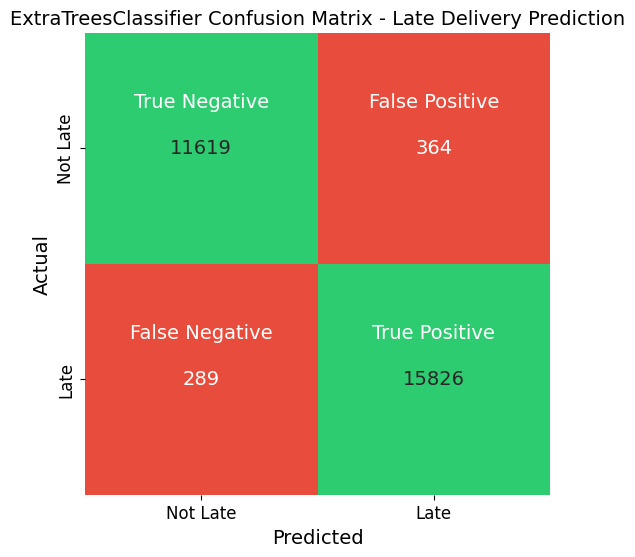

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c","#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(etc_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors,cbar=False, xticklabels=class_labels, yticklabels=class_labels,annot_kws={"fontsize": 14})
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('Actual',fontsize=14)
plt.title('ExtraTreesClassifier Confusion Matrix - Late Delivery Prediction',fontsize=14)


# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with specified hyperparameters
RandomForestClassifier_model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=0)

# Fit the model on the training data
RandomForestClassifier_model.fit(xlatedelivery_train, ylatedelivery_train)

# Predict the late delivery status using the trained model
RandomForestClassifier_ylatedelivery_pred = RandomForestClassifier_model.predict(xlatedelivery_test)

# Calculate evaluation metrics
rf_accuracy_latedelivery = accuracy_score(RandomForestClassifier_ylatedelivery_pred, ylatedelivery_test)
rf_recall_latedelivery = recall_score(RandomForestClassifier_ylatedelivery_pred, ylatedelivery_test)
rf_conf_latedelivery = confusion_matrix(ylatedelivery_test, RandomForestClassifier_ylatedelivery_pred)
rf_f1_latedelivery = f1_score(ylatedelivery_test, RandomForestClassifier_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', RandomForestClassifier_model)
print('Accuracy of late delivery status is:', rf_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', rf_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', rf_f1_latedelivery * 100, '%')

# Extract values from the confusion matrix
rf_TN = rf_conf_latedelivery[0, 0]
rf_FP = rf_conf_latedelivery[0, 1]
rf_FN = rf_conf_latedelivery[1, 0]
rf_TP = rf_conf_latedelivery[1, 1]

Model parameters used are: RandomForestClassifier(n_estimators=300, random_state=0)
Accuracy of late delivery status is: 98.36287280233469 %
Recall score of late delivery status is: 98.20779700683624 %
F1 score of late delivery status is: 98.57814045499505 %


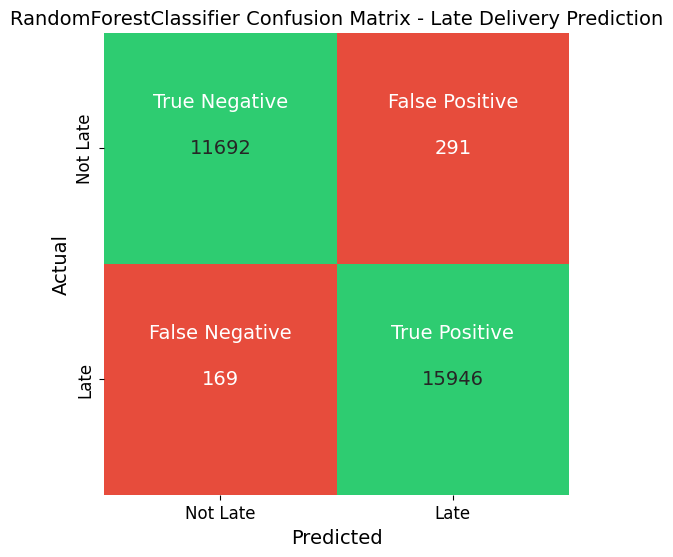

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c", "#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(rf_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('RandomForestClassifier Confusion Matrix - Late Delivery Prediction', fontsize=14)

# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

# Create a DecisionTreeClassifier with specified hyperparameters
DecisionTreeClassifier_model = DecisionTreeClassifier(max_depth=None, random_state=0)
num_features = DecisionTreeClassifier_model.n_features_
print(f"Number of features expected by the model: {num_features}")
# Fit the model on the training data
DecisionTreeClassifier_model.fit(xlatedelivery_train, ylatedelivery_train)

# Predict the late delivery status using the trained model
DecisionTreeClassifier_ylatedelivery_pred = DecisionTreeClassifier_model.predict(xlatedelivery_test)

# Calculate evaluation metrics
dt_accuracy_latedelivery = accuracy_score(DecisionTreeClassifier_ylatedelivery_pred, ylatedelivery_test)
dt_recall_latedelivery = recall_score(DecisionTreeClassifier_ylatedelivery_pred, ylatedelivery_test)
dt_conf_latedelivery = confusion_matrix(ylatedelivery_test, DecisionTreeClassifier_ylatedelivery_pred)
dt_f1_latedelivery = f1_score(ylatedelivery_test, DecisionTreeClassifier_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', DecisionTreeClassifier_model)
print('Accuracy of late delivery status is:', dt_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', dt_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', dt_f1_latedelivery * 100, '%')

# Extract values from the confusion matrix
dt_TN = dt_conf_latedelivery[0, 0]
dt_FP = dt_conf_latedelivery[0, 1]
dt_FN = dt_conf_latedelivery[1, 0]
dt_TP = dt_conf_latedelivery[1, 1]

Model parameters used are: DecisionTreeClassifier(random_state=0)
Accuracy of late delivery status is: 99.20279023418037 %
Recall score of late delivery status is: 99.2927600967802 %
F1 score of late delivery status is: 99.30508159086678 %


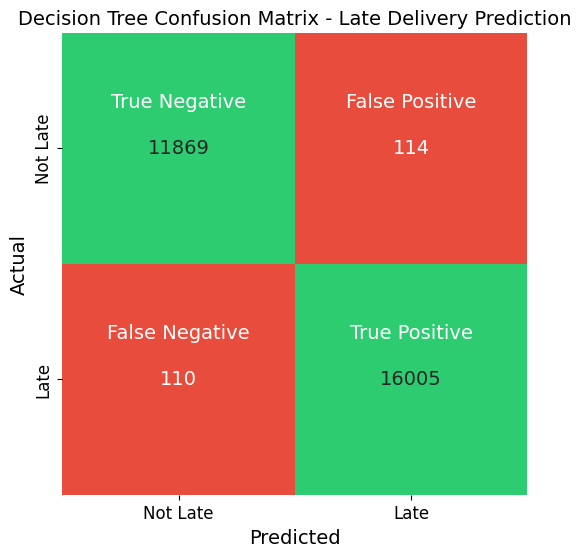

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c", "#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(dt_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Decision Tree Confusion Matrix - Late Delivery Prediction', fontsize=14)

# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier with specified hyperparameters
GradientBoostingClassifier_model = GradientBoostingClassifier(n_estimators=300, max_depth=3, random_state=0)

# Fit the model on the training data
GradientBoostingClassifier_model.fit(xlatedelivery_train, ylatedelivery_train)

# Predict the late delivery status using the trained model
GradientBoostingClassifier_ylatedelivery_pred = GradientBoostingClassifier_model.predict(xlatedelivery_test)

# Calculate evaluation metrics
gb_accuracy_latedelivery = accuracy_score(GradientBoostingClassifier_ylatedelivery_pred, ylatedelivery_test)
gb_recall_latedelivery = recall_score(GradientBoostingClassifier_ylatedelivery_pred, ylatedelivery_test)
gb_conf_latedelivery = confusion_matrix(ylatedelivery_test, GradientBoostingClassifier_ylatedelivery_pred)
gb_f1_latedelivery = f1_score(ylatedelivery_test, GradientBoostingClassifier_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', GradientBoostingClassifier_model)
print('Accuracy of late delivery status is:', gb_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', gb_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', gb_f1_latedelivery * 100, '%')

# Extract values from the confusion matrix
gb_TN = gb_conf_latedelivery[0, 0]
gb_FP = gb_conf_latedelivery[0, 1]
gb_FN = gb_conf_latedelivery[1, 0]
gb_TP = gb_conf_latedelivery[1, 1]

Model parameters used are: GradientBoostingClassifier(n_estimators=300, random_state=0)
Accuracy of late delivery status is: 96.3129048330842 %
Recall score of late delivery status is: 95.3940634595701 %
F1 score of late delivery status is: 96.83412785723017 %


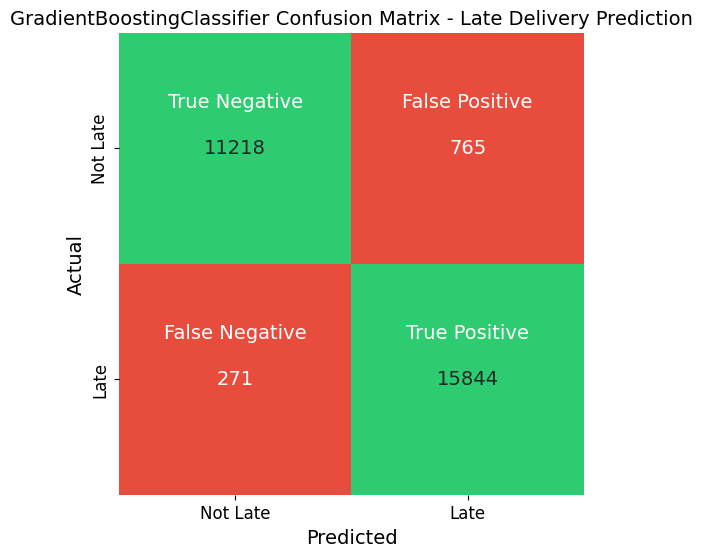

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c","#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(gb_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors,cbar=False, xticklabels=class_labels, yticklabels=class_labels,annot_kws={"fontsize": 14})
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('Actual',fontsize=14)
plt.title('GradientBoostingClassifier Confusion Matrix - Late Delivery Prediction',fontsize=14)


# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## XGBoost model

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier with specified hyperparameters
XGBClassifier_model = xgb.XGBClassifier(n_estimators=300, max_depth=None, random_state=0)

# Fit the model on the training data
XGBClassifier_model.fit(xlatedelivery_train, ylatedelivery_train)

# Predict the late delivery status using the trained model
XGBClassifier_ylatedelivery_pred = XGBClassifier_model.predict(xlatedelivery_test)

# Calculate evaluation metrics
xgb_accuracy_latedelivery = accuracy_score(XGBClassifier_ylatedelivery_pred, ylatedelivery_test)
xgb_recall_latedelivery = recall_score(XGBClassifier_ylatedelivery_pred, ylatedelivery_test)
xgb_conf_latedelivery = confusion_matrix(ylatedelivery_test, XGBClassifier_ylatedelivery_pred)
xgb_f1_latedelivery = f1_score(ylatedelivery_test, XGBClassifier_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', XGBClassifier_model)
print('Accuracy of late delivery status is:', xgb_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', xgb_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', xgb_f1_latedelivery * 100, '%')

# Extract values from the confusion matrix
xgb_TN = xgb_conf_latedelivery[0, 0]
xgb_FP = xgb_conf_latedelivery[0, 1]
xgb_FN = xgb_conf_latedelivery[1, 0]
xgb_TP = xgb_conf_latedelivery[1, 1]

Model parameters used are: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
Accuracy of late delivery status is: 99.99644102783117 %
Recall score of late delivery status is: 99.99379498634897 %
F1 score of late delivery status is: 99.99689739691601 %


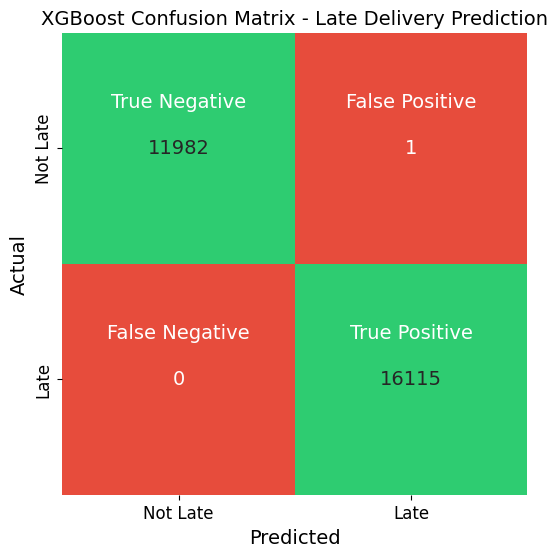

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c", "#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('XGBoost Confusion Matrix - Late Delivery Prediction', fontsize=14)

# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## CatBoost model

In [ ]:
pip install catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool

# Create a CatBoostClassifier with specified hyperparameters
CatBoostClassifier_model = CatBoostClassifier(iterations=300, depth=None, random_state=0, verbose=0)

# Fit the model on the training data
train_data = Pool(xlatedelivery_train, label=ylatedelivery_train)
CatBoostClassifier_model.fit(train_data)

# Predict the late delivery status using the trained model
CatBoostClassifier_ylatedelivery_pred = CatBoostClassifier_model.predict(xlatedelivery_test)

# Calculate evaluation metrics
cb_accuracy_latedelivery = accuracy_score(CatBoostClassifier_ylatedelivery_pred, ylatedelivery_test)
cb_recall_latedelivery = recall_score(CatBoostClassifier_ylatedelivery_pred, ylatedelivery_test)
cb_conf_latedelivery = confusion_matrix(ylatedelivery_test, CatBoostClassifier_ylatedelivery_pred)
cb_f1_latedelivery = f1_score(ylatedelivery_test, CatBoostClassifier_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', CatBoostClassifier_model.get_params())
print('Accuracy of late delivery status is:', cb_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', cb_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', cb_f1_latedelivery * 100, '%')

# Extract values from the confusion matrix
cb_TN = cb_conf_latedelivery[0, 0]
cb_FP = cb_conf_latedelivery[0, 1]
cb_FN = cb_conf_latedelivery[1, 0]
cb_TP = cb_conf_latedelivery[1, 1]

Model parameters used are: {'iterations': 300, 'verbose': 0, 'random_state': 0}
Accuracy of late delivery status is: 99.99644102783117 %
Recall score of late delivery status is: 99.99379498634897 %
F1 score of late delivery status is: 99.99689739691601 %


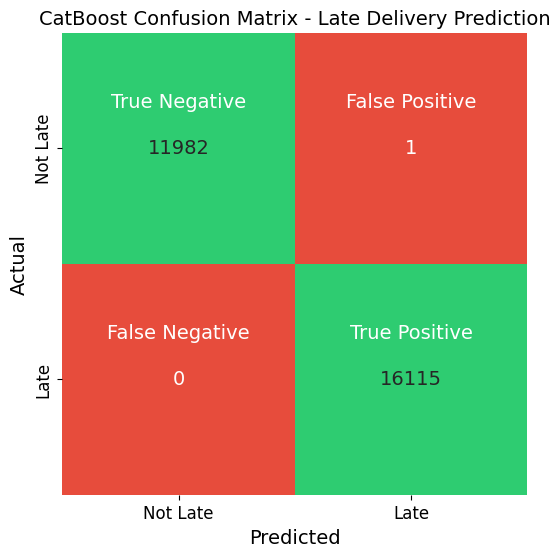

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c","#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cb_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors, cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('CatBoost Confusion Matrix - Late Delivery Prediction', fontsize=14)

# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## Ensembled Learning with Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of individual classifiers
classifiers = [
    ('RandomForest', RandomForestClassifier(n_estimators=300, max_depth=None, random_state=0)),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=300, max_depth=None, random_state=0)),
    ('DecisionTreeClassifier_model', DecisionTreeClassifier(max_depth=None, random_state=0))
    # Add more classifiers as needed
]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=classifiers, voting='hard')

# Fit the ensemble model on the training data
voting_classifier.fit(xlatedelivery_train, ylatedelivery_train)

# Predict the late delivery status using the ensemble model
voting_ylatedelivery_pred = voting_classifier.predict(xlatedelivery_test)

# Calculate evaluation metrics
v_accuracy_latedelivery = accuracy_score(voting_ylatedelivery_pred, ylatedelivery_test)
v_recall_latedelivery = recall_score(voting_ylatedelivery_pred, ylatedelivery_test)
v_conf_latedelivery = confusion_matrix(ylatedelivery_test, voting_ylatedelivery_pred)
v_f1_latedelivery = f1_score(ylatedelivery_test, voting_ylatedelivery_pred)

# Print the results
print('Model parameters used are:', GradientBoostingClassifier_model)
print('Accuracy of late delivery status is:', v_accuracy_latedelivery * 100, '%')
print('Recall score of late delivery status is:', v_recall_latedelivery * 100, '%')
print('F1 score of late delivery status is:', v_f1_latedelivery * 100, '%')

# Extract values from the confusion matrix
v_TN = v_conf_latedelivery[0, 0]
v_FP = v_conf_latedelivery[0, 1]
v_FN = v_conf_latedelivery[1, 0]
v_TP = v_conf_latedelivery[1, 1]

Model parameters used are: GradientBoostingClassifier(n_estimators=300, random_state=0)
Accuracy of late delivery status is: 98.76859562958218 %
Recall score of late delivery status is: 98.59476117103235 %
F1 score of late delivery status is: 98.93011750154608 %


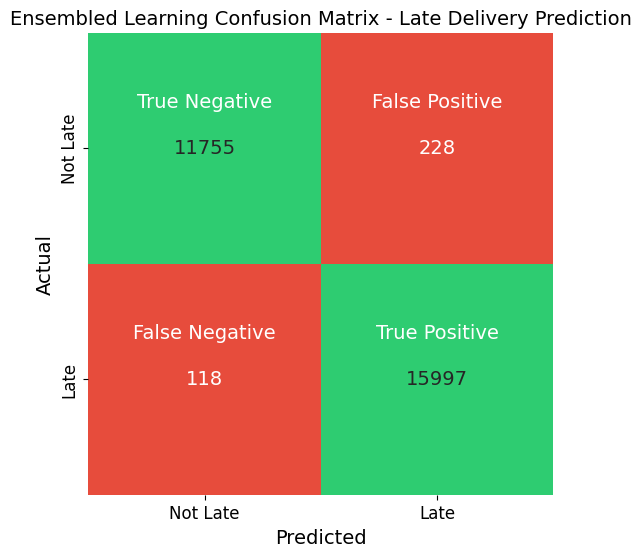

In [ ]:
# Define class labels
class_labels = ['Not Late', 'Late']

# Create a custom color map with green and red
cmap_colors = ["#e74c3c", "#2ecc71"]  # Green and Red colors
cmap = sns.color_palette(cmap_colors)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(v_conf_latedelivery, annot=True, fmt="d", cmap=cmap_colors, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Ensembled Learning Confusion Matrix - Late Delivery Prediction', fontsize=14)

# Add labels to the cells
plt.text(0.5, 0.3, 'True Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.3, 'False Positive', ha='center', va='center', color='white', fontsize=14)
plt.text(0.5, 1.3, 'False Negative', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 1.3, 'True Positive', ha='center', va='center', color='white', fontsize=14)

# Adjust font size of class labels using tick_params
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

 ### Models Evaluation

In [ ]:
from tabulate import tabulate
data = [["ExtraTreesClassifier", etc_f1_latedelivery*100, etc_accuracy_latedelivery*100, etc_recall_latedelivery*100, etc_TN, etc_FP, etc_FN, etc_TP],
        ["Random Forest Classification", rf_f1_latedelivery*100,rf_accuracy_latedelivery*100,rf_recall_latedelivery*100, rf_TN, rf_FP, rf_FN, rf_TP],
        ["Decission Tree", dt_f1_latedelivery*100,dt_accuracy_latedelivery*100,dt_recall_latedelivery*100,dt_TN, dt_FP, dt_FN, dt_TP],
        ["Gradient Boosting", gb_f1_latedelivery*100,gb_accuracy_latedelivery*100,gb_recall_latedelivery*100,gb_TN, gb_FP, gb_FN, gb_TP],
        ["XGBoost model",xgb_f1_latedelivery*100,xgb_accuracy_latedelivery*100,xgb_recall_latedelivery*100,xgb_TN, xgb_FP, xgb_FN, xgb_TP],
        ["CatBoost Model",cb_f1_latedelivery*100,cb_accuracy_latedelivery*100,cb_recall_latedelivery*100,cb_TN, cb_FP, cb_FN, cb_TP],
        ["Ensembled Learning with Voting Classifier Model",v_f1_latedelivery*100,v_accuracy_latedelivery*100,v_recall_latedelivery*100,v_TN, v_FP, v_FN, v_TP]]

col_names = ["Algorithms", "F1 Score", "Accuracy", "Recall","True Negative", "False Positive", "False Negative", "True Positive"]
print(tabulate(data, headers=col_names))

Algorithms                                         F1 Score    Accuracy    Recall    True Negative    False Positive    False Negative    True Positive
-----------------------------------------------  ----------  ----------  --------  ---------------  ----------------  ----------------  ---------------
ExtraTreesClassifier                                97.9786     97.676    97.7517            11619               364               289            15826
Random Forest Classification                        98.5781     98.3629   98.2078            11692               291               169            15946
Decission Tree                                      99.3051     99.2028   99.2928            11869               114               110            16005
Gradient Boosting                                   96.8341     96.3129   95.3941            11218               765               271            15844
XGBoost model                                       99.9969     99.9964   99.9938       

In [ ]:
import pickle

# Specify the file path where you want to save the model
model_filename = '/content/drive/MyDrive/pj notebooks/ml_model.pkl'

# Use pickle.dump() to save the model to the specified file path
with open(model_filename, 'wb') as model_file:
    pickle.dump(DecisionTreeClassifier_model, model_file)

# Verify that the model has been saved
print(f"Model has been saved to {model_filename}")


Model has been saved to /content/drive/MyDrive/pj notebooks/ml_model.pkl
